In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
data_dir = 'instrucciones'
train_file = 'datosEntrenamiento.csv'
validation_file = 'datosValidacion.csv'
test_file = 'datosPrueba.csv'

In [3]:
train_data = pd.read_csv(os.path.join(data_dir,train_file), header=None)
validation_data = pd.read_csv(os.path.join(data_dir,validation_file), header=None)
test_data = pd.read_csv(os.path.join(data_dir,test_file), header=None)

# Estadísticas de los datos
Se revisa las medidas de tendencia central de cada uno de los datos para obtener información básica de ellos. Como ya se describe en el problema se tienen 6698 datos de entrenamiento, 1913 de validación y 957 de prueba.

In [7]:
train_data.describe()

,0,1,2,3,4
count,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000
mean,19.630527,54.279694,1013.223340,73.322369,454.416621
std,7.505809,12.692867,5.956539,14.622826,17.178379
min,1.810000,25.360000,992.890000,26.300000,425.160000
25%,13.452500,41.660000,1009.010000,63.262500,439.735000
50%,20.300000,52.330000,1012.945000,75.000000,451.405000
75%,25.720000,66.510000,1017.220000,84.810000,468.592500
max,35.770000,80.250000,1033.300000,100.160000,495.760000


In [8]:
validation_data.describe()

,0,1,2,3
count,1913.000000,1913.000000,1913.000000,1913.000000
mean,19.801166,54.476785,1013.332321,73.081464
std,7.371983,12.813000,5.868163,14.825341
min,3.400000,25.360000,995.240000,25.890000
25%,13.580000,41.820000,1009.380000,62.960000
50%,20.600000,52.050000,1012.880000,74.560000
75%,25.970000,66.560000,1017.310000,85.090000
max,37.110000,81.560000,1033.290000,100.150000


In [9]:
test_data.describe()

,0,1,2,3,4
count,957.000000,957.000000,957.000000,957.000000,957.000000
mean,19.496426,54.146761,1013.362800,73.670042,454.914817
std,7.237480,12.611449,5.958237,13.982663,16.645690
min,2.710000,34.690000,996.320000,25.560000,425.290000
25%,13.740000,41.740000,1009.210000,64.380000,440.740000
50%,20.110000,51.430000,1013.100000,75.270000,452.890000
75%,25.400000,66.490000,1017.380000,84.420000,467.950000
max,35.100000,80.180000,1033.040000,100.090000,495.230000


------
Al parecer los datos tienen medidas muy parecidas en las variables, por lo que se utiliza para el siguiente paso solamente el conjunto de entrenamiento.
A continuación se realiza un histograma de cada una de las variables  datos para verificar su distribución. Una vez verificado esto se normalizan los datos para centrar la media en 0 y probar con estos datos otros modelos más adelante.

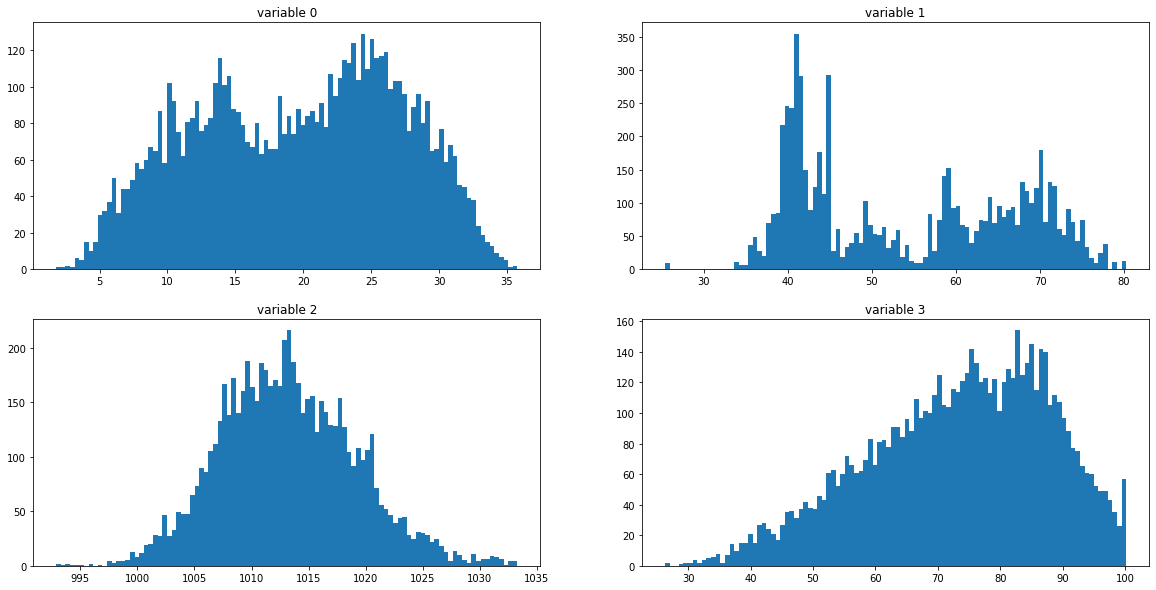

In [8]:
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(2,2,1)
plt.hist(train_data[0], bins=100)
plt.title('variable 0')

plt.subplot(2,2,2)
plt.hist(train_data[1], bins=100)
plt.title('variable 1')

plt.subplot(2,2,3)
plt.hist(train_data[2], bins=100)
plt.title('variable 2')

plt.subplot(2,2,4)
plt.hist(train_data[3], bins=100)
plt.title('variable 3')

plt.show()

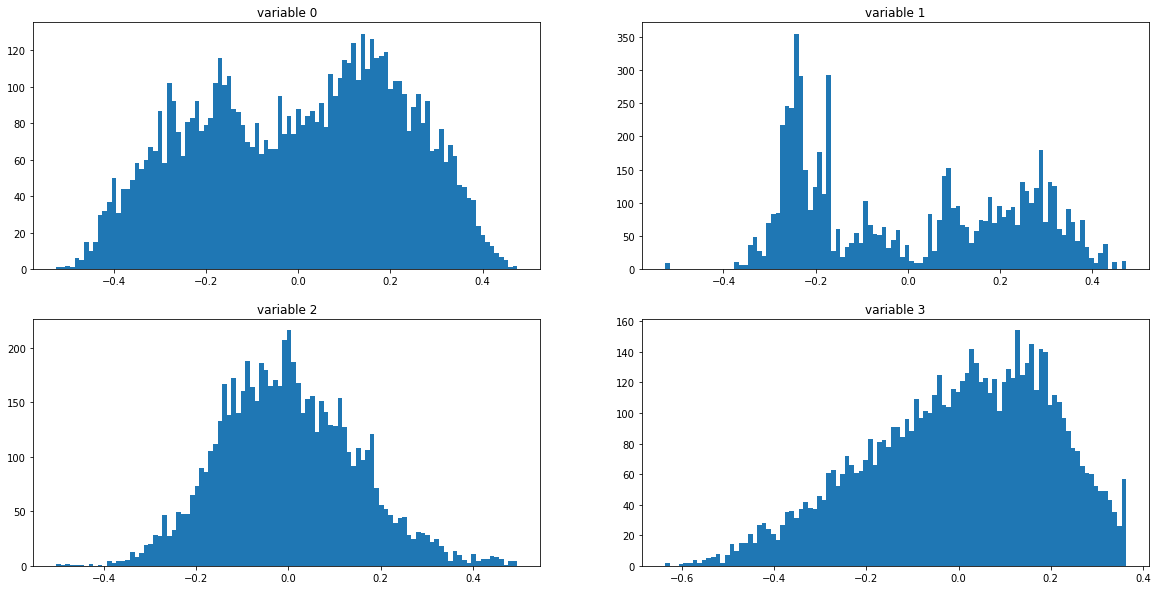

                  0             1             2             3             4
count  6.698000e+03  6.698000e+03  6.698000e+03  6.698000e+03  6.698000e+03
mean   2.075245e-16 -6.250532e-15 -3.181689e-15  3.235526e-15  1.894666e-14
std    2.210191e-01  2.312419e-01  1.474026e-01  1.979803e-01  2.433198e-01
min   -5.247505e-01 -5.268663e-01 -5.031759e-01 -6.366419e-01 -4.143997e-01
25%   -1.819207e-01 -2.299088e-01 -1.042648e-01 -1.362019e-01 -2.079550e-01
50%    1.971357e-02 -3.552002e-02 -6.887894e-03  2.271366e-02 -4.265753e-02
75%    1.793131e-01  2.228148e-01  9.890275e-02  1.555325e-01  2.007915e-01
max    4.752495e-01  4.731337e-01  4.968241e-01  3.633581e-01  5.856003e-01
                  0             1             2             3             4
count  9.570000e+02  9.570000e+02  9.570000e+02  9.570000e+02  9.570000e+02
mean   1.160108e-17  1.100478e-15 -5.273269e-14  1.156627e-15 -4.642751e-15
std    2.234480e-01  2.772356e-01  1.622614e-01  1.876112e-01  2.379996e-01
min   -5.182

In [19]:
# normalize data
nor_train_data = (train_data - train_data.mean()) / (train_data.max() - train_data.min())
nor_test_data = (test_data - test_data.mean()) / (test_data.max() - test_data.min())

plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(2,2,1)
plt.hist(nor_train_data[0], bins=100)
plt.title('variable 0')

plt.subplot(2,2,2)
plt.hist(nor_train_data[1], bins=100)
plt.title('variable 1')

plt.subplot(2,2,3)
plt.hist(nor_train_data[2], bins=100)
plt.title('variable 2')

plt.subplot(2,2,4)
plt.hist(nor_train_data[3], bins=100)
plt.title('variable 3')

plt.show()
print(nor_train_data.describe())
print(nor_test_data.describe())

## Análisis previo de los datos
Se realiza un análisis de correlación con los datos de prueba y entrenamiento con lo que se enuentra una relación lineal fuerte (en ambos conjuntos) entre la variable 0 y la 1 con un 84.3%, la 0 con la variable objetivo (4) en un -94.8% y la 1 con la 4 en un 86.9%. Lo que indica que podrían ser las variables suficientes para encontrar un modelo lineal. Sin embargo se exploran más modelos además de los lineales.

In [13]:
print('Correlación de los datos de entrenamiento')
print(train_data.corr())
print('Correlación de los datos de prueba')
print(test_data.corr())

Correlación de los datos de entrenamiento
          0         1         2         3         4
0  1.000000  0.843183 -0.503403 -0.543673 -0.948731
1  0.843183  1.000000 -0.410853 -0.309859 -0.869185
2 -0.503403 -0.410853  1.000000  0.096809  0.517436
3 -0.543673 -0.309859  0.096809  1.000000  0.389565
4 -0.948731 -0.869185  0.517436  0.389565  1.000000
Correlación de los datos de prueba
          0         1         2         3         4
0  1.000000  0.852479 -0.502131 -0.509559 -0.946956
1  0.852479  1.000000 -0.418897 -0.303440 -0.873017
2 -0.502131 -0.418897  1.000000  0.054484  0.510004
3 -0.509559 -0.303440  0.054484  1.000000  0.360374
4 -0.946956 -0.873017  0.510004  0.360374  1.000000


Se realiza una grafica de dispersión de los datos para verificar la correlación de las variables mencionadas anteriormente.

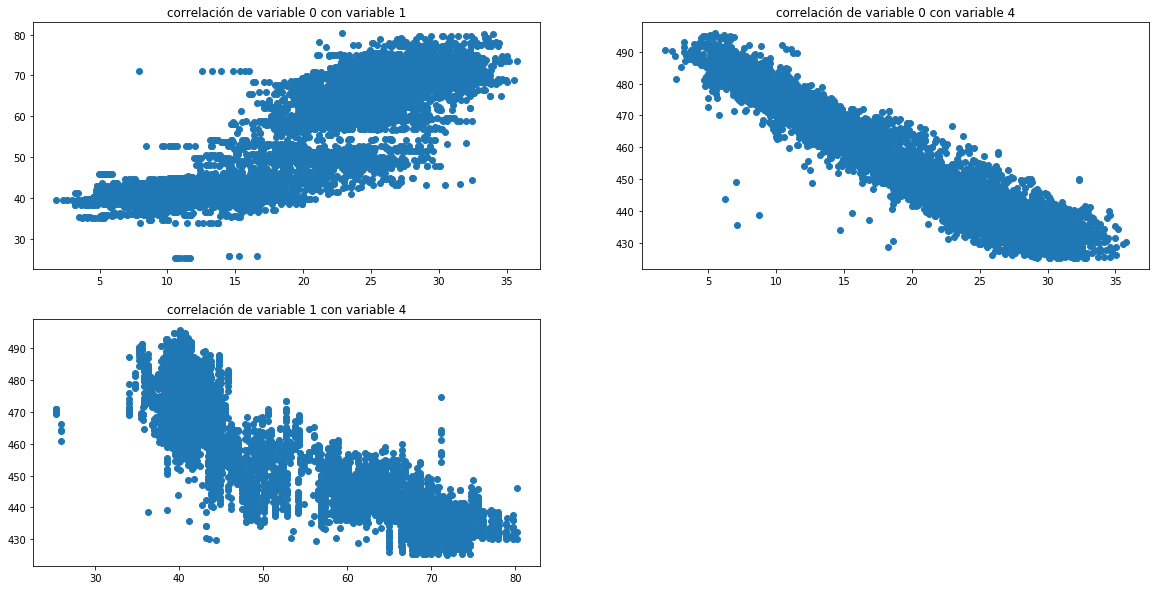

In [19]:
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(2, 2, 1)
plt.scatter(train_data[0], train_data[1])
plt.title('correlación de variable 0 con variable 1')

plt.subplot(2, 2, 2)
plt.scatter(train_data[0], train_data[4])
plt.title('correlación de variable 0 con variable 4')

plt.subplot(2, 2, 3)
plt.scatter(train_data[1], train_data[4])
plt.title('correlación de variable 1 con variable 4')

plt.show()

Se puede observar en las gráficas de arriba como se relaciona la variable 0 con la variable 4 (la variable objetivo) de manera lineal con lo que un modelo líneal simple con estas dos variables podŕia ser suficiente.

## Experimentación con modelos
En esta sección se experimenta con modelos de regresión en específico se experimenta con 4 modelos: regresión lineal, ridge regression, redes neuronales y un modelo polinomial multivariado. Para la regresión logística, la red neuronal (MLPN) y el preprocesamiento de los datos se utiliza la librería de scikit-learn. Para el modelo polinomial se utiliza un algoritmo experimental con algoritmos genéticos. Los modelos se entrenan con las variables 0 y 4 para la regresión lineal; las variables 0, 1 y 4 para la regresión logística, MLPN y modelo polinomial; y por último se realiza la misma regresión con los últimos 3 modelos con todas las variables y se comparan los resultados.

### Regresión lineal con Least Squares
Se aplica un modelo de regresión lineal con Least Squares para verificar la relación entre las variables 0 y 4. Se prueban con los datos originales y los normalizados

Model accuracy: 0.8965617526570763%


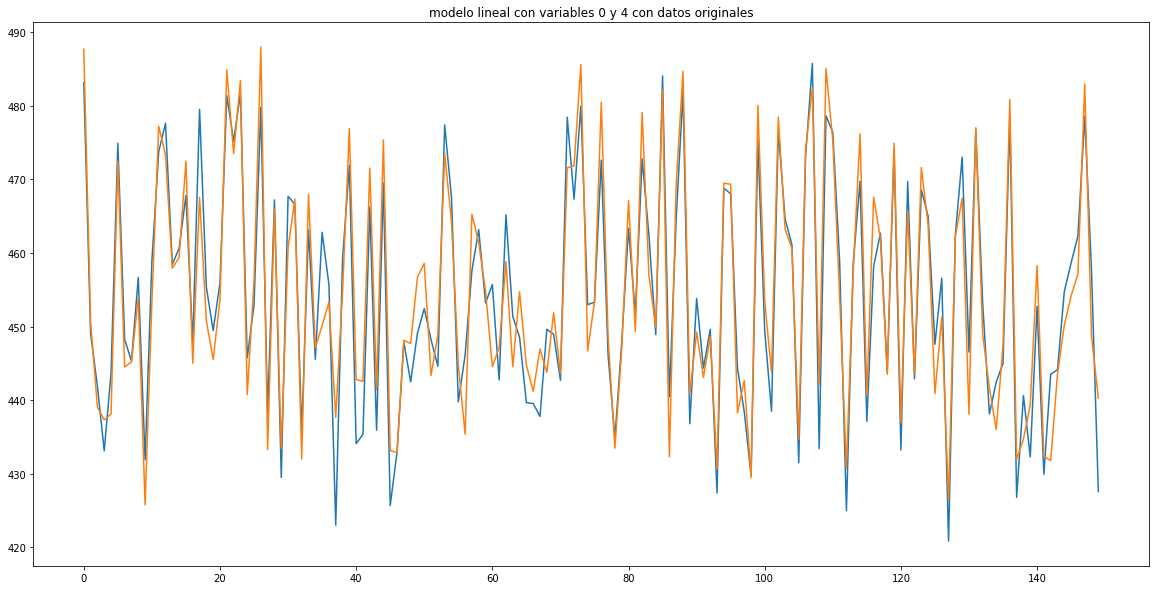

In [21]:
from sklearn.linear_model import LinearRegression

pred_vars = 0
target_var = 4

linear_model = LinearRegression()
linear_model.fit(train_data[pred_vars].to_numpy().reshape(-1,1),train_data[target_var].to_numpy())

print(f'Model accuracy: {linear_model.score(test_data[pred_vars].to_numpy().reshape(-1,1), test_data[target_var])}%')

prediction = linear_model.predict(test_data[pred_vars].to_numpy().reshape(-1,1))

x = [i for i in range(len(prediction[:150]))]
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(x, prediction[:150])
plt.plot(x, test_data[target_var][:150])
plt.title('modelo lineal con variables 0 y 4 con datos originales')
plt.show()

Model accuracy: 0.8955929938327822%


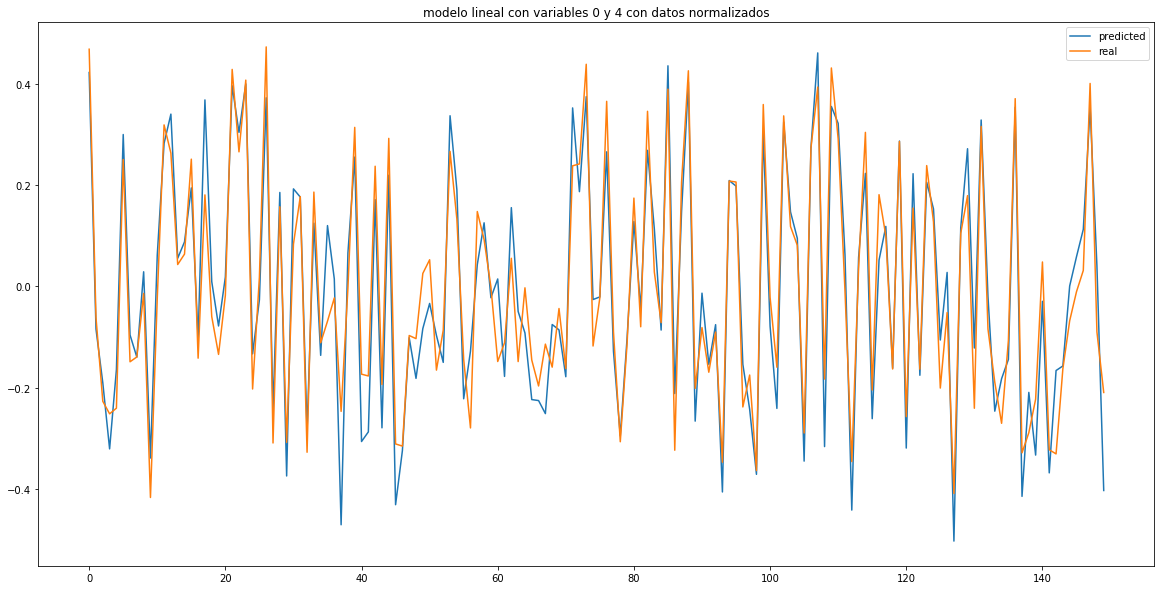

In [22]:
linear_model.fit(nor_train_data[pred_vars].to_numpy().reshape(-1,1),nor_train_data[target_var].to_numpy())

print(f'Model accuracy: {linear_model.score(nor_test_data[pred_vars].to_numpy().reshape(-1,1), nor_test_data[target_var])}%')

prediction = linear_clf.predict(nor_test_data[pred_vars].to_numpy().reshape(-1,1))

x = [i for i in range(len(prediction[:150]))]

plt.rcParams["figure.figsize"] = (20,10)
label1, = plt.plot(x, prediction[:150], label='predicted')
label2, = plt.plot(x, nor_test_data[target_var][:150], label='real')
plt.legend(handles=[label1,label2])
plt.title('modelo lineal con variables 0 y 4 con datos normalizados')
plt.show()

A pesar de la simplicidad del modelo se obtiene una precisión muy buena del 89% con solo esas dos variables en los datos originales. En la gráfica se puede ver la similitud de ambas variables.

Los resultados obtenidos los datos normalizados fueron ligeramente peores, es tan pequeño que es despreciable.

###  Ridge Regression
A continuación se entrena un modelo de regresión lineal con penalización l2 o ridge comparando los resultados con diferentes valores para el peso de penalización _alpha_

In [31]:
from sklearn.linear_model import Ridge
alphas = [1,.1,.01,.001,.0001]
pred_vars = [0]
labels = []
scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(train_data[pred_vars].to_numpy().reshape(-1,1),train_data[target_var].to_numpy())
    score = ridge_model.score(test_data[pred_vars].to_numpy().reshape(-1,1), test_data[target_var])
    print(f'alpha={alpha}\t accuracy: {score*100}%')

alpha=1	 accuracy: 89.6561737154278%
alpha=0.1	 accuracy: 89.65617511073565%
alpha=0.01	 accuracy: 89.65617525021099%
alpha=0.001	 accuracy: 89.65617526415797%
alpha=0.0001	 accuracy: 89.65617526555266%


Como se puede observar aun con la variación de alphas la precisión no es mucho mejor que el modelo lineal de _least squares_. A continuación se prueba aumentando variables con 0 y 1 y con todas.

In [45]:
alphas = [1,.1,.01,.001,.0001]
pred_vars = [0,1]
labels = []
scores = []

print(train_data[pred_vars].to_numpy().reshape(int(len(train_data)/2),1).shape)

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(train_data[pred_vars].to_numpy(),train_data[target_var].to_numpy())
    score = ridge_model.score(test_data[pred_vars].to_numpy().reshape(-1,1), test_data[target_var])
    print(f'alpha={alpha}\t accuracy: {score*100}%')

ValueError: cannot reshape array of size 13396 into shape (3349,1)

Model accuracy: 0.9049801419171186%


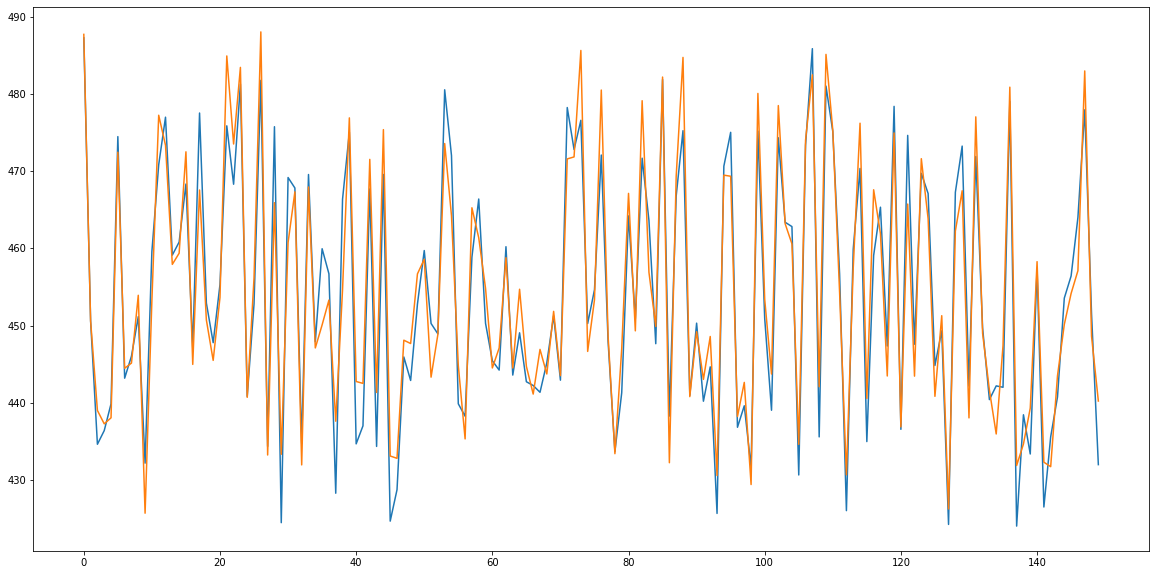

In [60]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

pred_vars = [0,1,2,3]
target_var = 4

scaler = MinMaxScaler()

scaler.fit(train_data)

sc_train = scaler.transform(train_data)
sc_test = scaler.transform(test_data)

MLP_clf = MLPRegressor(learning_rate='adaptive')
MLP_clf.fit(train_data[pred_vars],train_data[target_var].to_numpy())

print(f'Model accuracy: {MLP_clf.score(test_data[pred_vars].to_numpy(), test_data[target_var])}%')

prediction = MLP_clf.predict(test_data[pred_vars].to_numpy())

x = [i for i in range(len(prediction[:150]))]
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(x, prediction[:150])
plt.plot(x, test_data[target_var][:150])
plt.show()